In [1]:
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from matplotlib.ticker import MultipleLocator
import nibabel as nib
import pickle

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [2]:
from funcs.imgproc import get_imgs_designmx, rms_all, feature_df, show_stim, get_rms_contrast, get_rms_contrast_lab, get_contrast_df, get_img_prf, get_visfeature_dict
from funcs.rf_tools import get_mask, css_gaussian_cut, make_circle_mask, make_visrois_dict, write_prf_dict
from funcs.utility import print_dict_structure, print_large, get_zscore, hypotheses_plot, multiple_regression
from funcs.analyses import multivariate_regression, regression_dict_multivariate, plot_roi_beta_distribution, get_hrf_dict, plot_beta_to_icept, reg_plots
from funcs.utility import numpy2coords, coords2numpy, filter_array_by_size, find_common_rows
# from funcs.viscontrasts import lgn_statistics
from notebooks.alien_nbs.lgnpy.lgnpy.CEandSC import lgn_statistics

In [3]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'n', n_subjects=n_subjects)
prf_dict = write_prf_dict(binary_masks = vismask_dict)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 5383
V4_mask
Non-zero voxels in V4_mask: 3184
Subject 6
V1_mask
Non-zero voxels in V1_mask: 6479
V2_mask
Non-zero voxels in V2_mask: 6905
V3_mask
Non-zero voxels in V3_mask: 71

Load in the visual contrast features (currently only rms)

In [4]:
with open('./data/custom_files/all_visfeats_rms.pkl', 'rb') as fp:
   visfeats_rms = pickle.load(fp)

Load in the pRF based voxel selection masks. Important to notice is that these masks are different form the voxmasks created using the get_hrf_dict function, as those filter out even more voxels based on newly included restrictions. Thus, the prf_masks are more liberal than the voxmasks. The reason for this is because it allows us to do some precise voxel selection of an intitial relatively rough selection, without having to retrieve a completely new mask. 

In [5]:

# Load in the saved masks for selected voxels that have their prf inside the inner patch.
with open('./data/custom_files/subj01/prf_mask_center_strict.pkl', 'rb') as fp:
    prf_mask_center_strict = pickle.load(fp)
    
    
with open('./data/custom_files/subj01/prf_mask_central_loose.pkl', 'rb') as fp:
    prf_mask_central_loose = pickle.load(fp) 
    

# Load in the saved file
with open('./data/custom_files/subj01/prf_mask_periphery_strict.pkl', 'rb') as fp:
   prf_mask_periphery_strict = pickle.load(fp)


# Load in the saved file
with open('./data/custom_files/subj01/new_prf_mask_central_strict.pkl', 'rb') as fp:
   new_central_mask = pickle.load(fp)

Load in the HRF signal dictionaries for different voxel selections

beta_dict0_2.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 2250
beta_dict3_5.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 4500
beta_dict6_10.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 8250
beta_dict11_15.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 12000
beta_dict16_20.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 15750
beta_dict21_27.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 21000
beta_dict28_35.pkl
	Amount of voxels: 98
	Amount of voxels: 171
	Amount of voxels: 156
	Amount of voxels: 223
	Processed images: 27000
beta_dict36_39.pkl
	Amount of voxels: 98
	Amount of voxels: 171

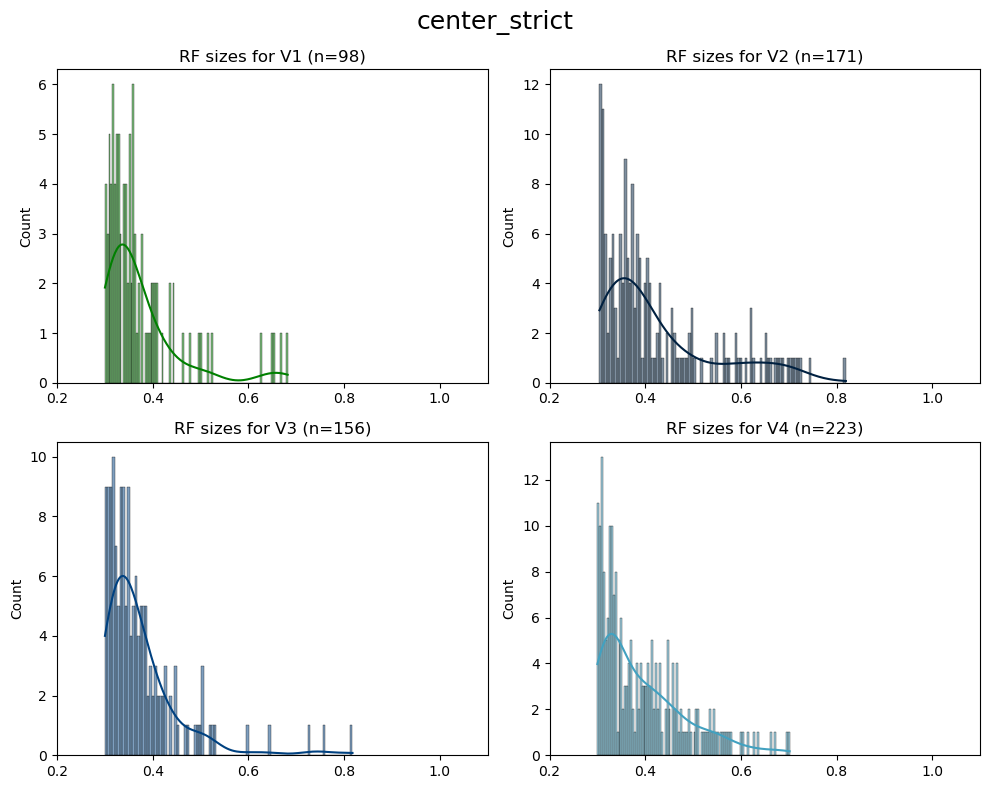

In [11]:
# 1 min
# hrf_dict = get_hrf_dict('subj01', voxels = prf_selection_mask)
hrf_dict_tight, voxmask_tight, joint_voxs, sizes  = get_hrf_dict('subj01', voxels = prf_mask_center_strict, prf_region = 'center_strict', 
                                             min_size = .3, max_size = 1, prf_proc_dict = prf_dict, plot_sizes = 'y')



beta_dict0_5_center_loose.pkl
	Amount of voxels: 156
	Amount of voxels: 161
	Amount of voxels: 160
	Amount of voxels: 111
	Processed images: 4500
beta_dict6_15_center_loose.pkl
	Amount of voxels: 156
	Amount of voxels: 161
	Amount of voxels: 160
	Amount of voxels: 111
	Processed images: 12000
beta_dict16_25_center_loose.pkl
	Amount of voxels: 156
	Amount of voxels: 161
	Amount of voxels: 160
	Amount of voxels: 111
	Processed images: 19500
beta_dict26_35_center_loose.pkl
	Amount of voxels: 156
	Amount of voxels: 161
	Amount of voxels: 160
	Amount of voxels: 111
	Processed images: 27000
beta_dict36_39_center_loose.pkl
	Amount of voxels: 156
	Amount of voxels: 161
	Amount of voxels: 160
	Amount of voxels: 111
	Processed images: 30000


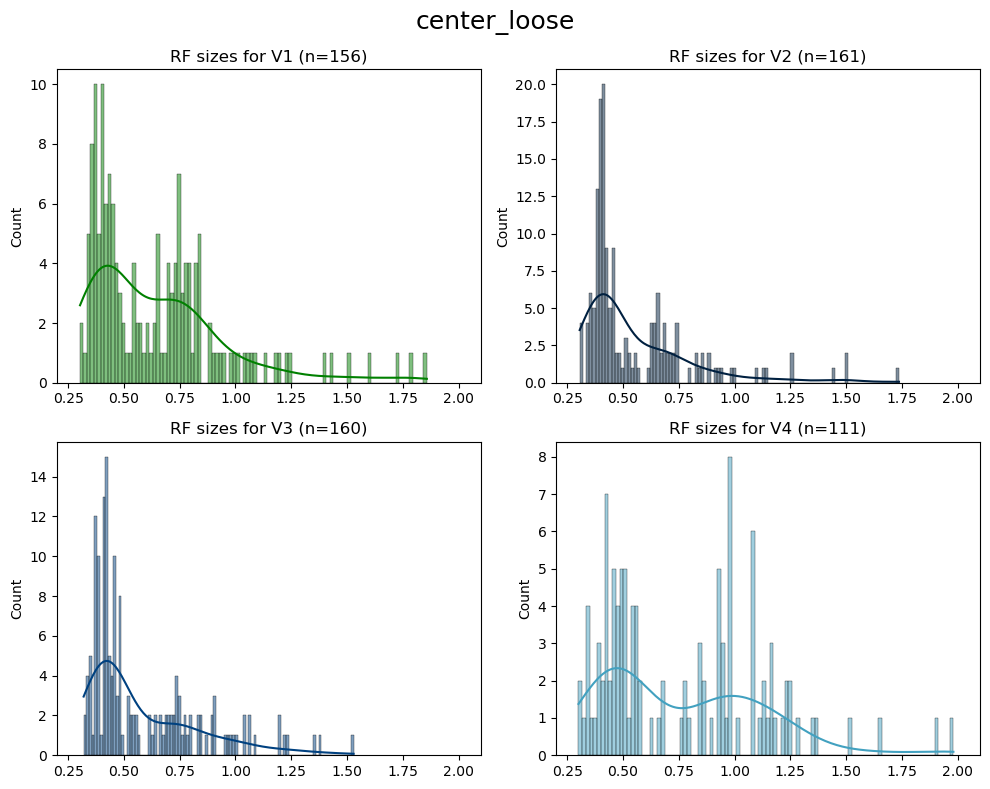

In [12]:
# Create the hrf_dict for the periphery with sizes .2 to 1

hrf_dict_central_loose, voxmask_central_loose, joint_voxs, sizes = get_hrf_dict('subj01', prf_mask_central_loose, prf_region = 'center_loose', 
                                                                    min_size = .3, max_size = 2, prf_proc_dict = prf_dict, 
                                                                    vox_n_cutoff = None, plot_sizes = 'y')

beta_dict0_5_periphery.pkl
	Amount of voxels: 139
	Amount of voxels: 143
	Amount of voxels: 147
	Amount of voxels: 147
	Processed images: 4500
beta_dict6_15_periphery.pkl
	Amount of voxels: 139
	Amount of voxels: 143
	Amount of voxels: 147
	Amount of voxels: 147
	Processed images: 12000
beta_dict16_25_periphery.pkl
	Amount of voxels: 139
	Amount of voxels: 143
	Amount of voxels: 147
	Amount of voxels: 147
	Processed images: 19500
beta_dict26_35_periphery.pkl
	Amount of voxels: 139
	Amount of voxels: 143
	Amount of voxels: 147
	Amount of voxels: 147
	Processed images: 27000
beta_dict36_39_periphery.pkl
	Amount of voxels: 139
	Amount of voxels: 143
	Amount of voxels: 147
	Amount of voxels: 147
	Processed images: 30000


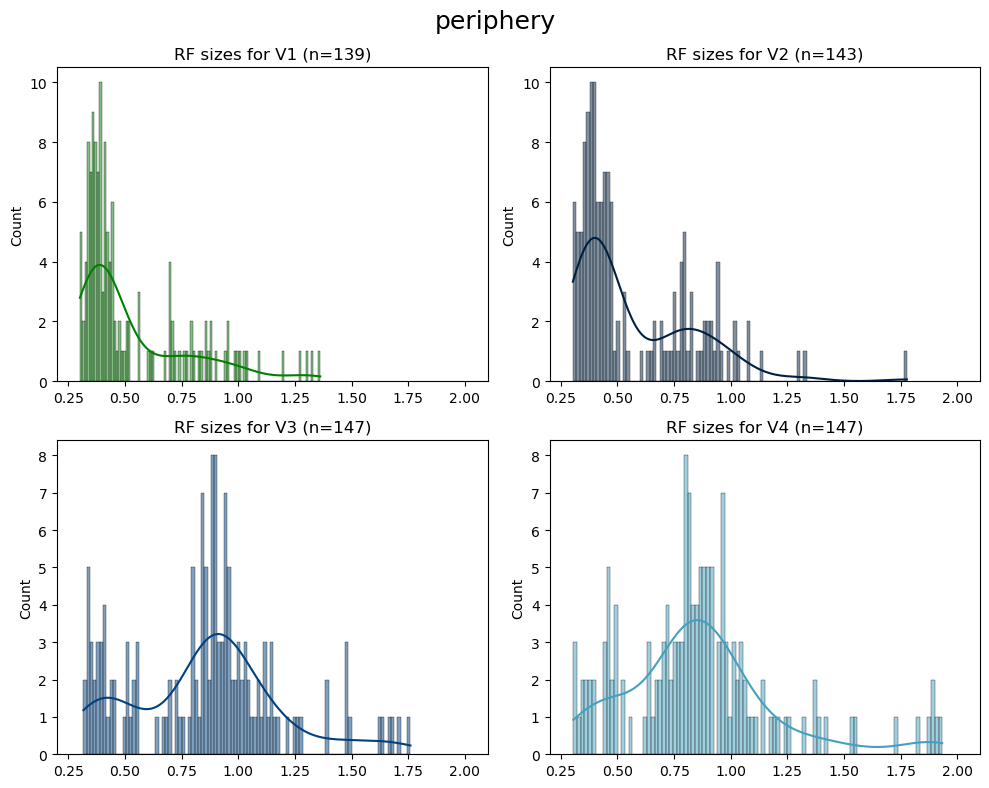

In [10]:
# Create the hrf_dict for the periphery with sizes .2 to 1
# The plot shows the ROI-specific distribution of RF sizes
hrf_dict_peri, voxmask_tight_peri, joint_voxs, sizes = get_hrf_dict('subj01', prf_mask_periphery_strict, prf_region = 'periphery', 
                                                                    min_size = .3, max_size = 2, prf_proc_dict = prf_dict, 
                                                                    vox_n_cutoff = 160, plot_sizes = 'y')


In [ ]:
# def regression_dict_multivariate(subject, feat_type, voxels, hrfs, feat_vals, n_imgs='all', z_scorey:bool = False):
#     reg_dict = {}
    
#     # Set the amount of images to regress over in case all images are available.
#     if n_imgs == 'all':
#         n_imgs = len(feat_vals)
    
#     X = np.array(feat_vals[feat_type][:n_imgs]).reshape(n_imgs, 1)  # Set the input matrix for the regression analysis

#     # This function will run the multiple regression analysis for each voxel, roi, image, for a subject.
#     rois = list(voxels[subject].keys())

#     for roi in rois:
#         reg_dict[roi] = {}
#         voxel_mask = voxels[subject][roi]  # These are the boolean mask for the specific subject, roi
#         n_voxels = np.sum(voxel_mask).astype('int')  # This is the number of voxels in this roi
#         vox_indices = np.column_stack(np.where(voxel_mask == 1))  # Get voxel indices for the current ROI
        
#         # Extract y_matrix for all voxels within the ROI
            
#         if z_scorey:
#             y_matrix = get_zscore(y_matrix, print_ars = 'n')
            
#         y_matrix = np.array([hrfs[subject][roi][f'voxel{voxel + 1}']['hrf_betas'] for voxel, xyz in enumerate(vox_indices)]).T #/ 300


#         # Perform multivariate regression
#         beta_values, intercept_values, rsquared_value, reg_model = multivariate_regression(X, y_matrix, z_scorey = z_scorey)
        
        
#         reg_dict[roi]['voxels'] = {}
        
#         for voxel, vox_idx in enumerate(vox_indices):
#             reg_dict[roi]['voxels'][f'vox{voxel}'] = {
#                 'xyz': list(vox_idx),
#                 'beta': beta_values[voxel],
#                 'icept': intercept_values[voxel]
#             }
            
#         reg_dict[roi]['y_matrix'] = y_matrix
#         reg_dict[roi]['all_reg_betas'] = beta_values
#         reg_dict[roi]['all_intercepts'] = intercept_values
#         reg_dict[roi]['rsquared'] = rsquared_value
    
#     return reg_dict, X

In [13]:
# Regression for the relevant and irrelevant RMS values for the central strict RFs

regdict_prfc_tight_rmsrel, X_subj1_rel = regression_dict_multivariate('subj01', 'rms_z',voxmask_tight, hrf_dict_tight, 
                                                                                            visfeats_rms['subj01']['rms'], n_imgs=30000, z_scorey = False)

regdict_prfc_tight_rmsirrel, X_subj1_irrel = regression_dict_multivariate('subj01', 'rms_z', voxmask_tight, hrf_dict_tight, 
                                                                                            visfeats_rms['subj01']['rms_irrelevant'], n_imgs=30000, z_scorey = False)

# Regression for the relevant and irrelevant RMS values for the central loose RFs

regdict_prfc_loose_rmsrel, X_subj1_rel = regression_dict_multivariate('subj01', 'rms_z',voxmask_central_loose, hrf_dict_central_loose, 
                                                                                            visfeats_rms['subj01']['rms'], n_imgs=30000, z_scorey = False)

regdict_prfc_loose_rmsirrel, X_subj1_irrel = regression_dict_multivariate('subj01', 'rms_z', voxmask_central_loose, hrf_dict_central_loose, 
                                                                                            visfeats_rms['subj01']['rms_irrelevant'], n_imgs=30000, z_scorey = False)

# Regression for the relevant and irrelevant RMS values for the strict peripheral RFs

regdict_prfp_tight_rmsrel, X_subj1_rel = regression_dict_multivariate('subj01', 'rms_z',voxmask_tight_peri, hrf_dict_peri, 
                                                                                            visfeats_rms['subj01']['rms'], n_imgs=30000, z_scorey = False)


# Does this make sense? no not really. These is a comparison between peripheral RF HRF signal and the irrelevant RMS values (which a proportion of the
# RFs actually overlap with). I could check out whether peripheral RFs are location specific in their responses, but that is like a sanity check
# of a sanity check of a sanity check, not really crucial.
regdict_prfp_tight_rmsirrel, X_subj1_irrel = regression_dict_multivariate('subj01', 'rms_z', voxmask_tight_peri, hrf_dict_peri, 
                                                                                            visfeats_rms['subj01']['rms_irrelevant'], n_imgs=30000, z_scorey = False)


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  4., 12., 19., 12.,  7., 11.,  6.,
         6.,  3.,  8.,  2.,  2.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([-0.2203 , -0.2144 , -0.2085 , -0.20259, -0.19669, -0.19079,
        -0.18488, -0.17898, -0.17308, -0.16718, -0.16127, -0.15537,
        -0.14947, -0.14357, -0.13766, -0.13176, -0.12586, -0.11995,
        -0.11405, -0.10815, -0.10225, -0.09634, -0.09044, -0.08454,
        -0.07864, -0.07273, -0.06683, -0.06093, -0.05502, -0.04912,
        -0.04322, -0.03732, -0.03141, -0.02551, -0.01961, -0.0137 ,
        -0.0078 , -0.0019 ,  0.004  ,  0.00991,  0.01581,  0.02171,
         0.02761,  0.03352,  0.03942,  0.04532,  0.05123,  0.05713,
         0.06303,  0.06893,  0.07484]),
 <BarContainer object of 50 artists>)

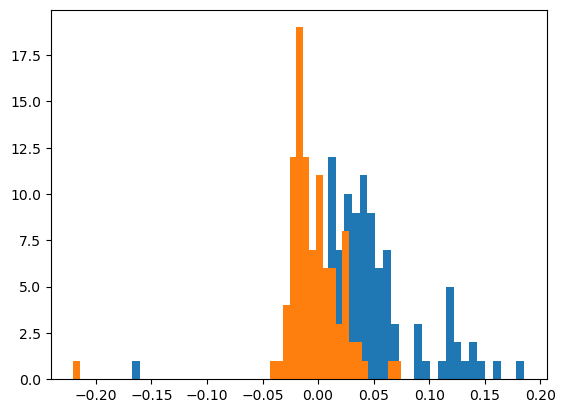

In [16]:
b1, i1, r1, results1 = multivariate_regression(X_subj1_rel, regdict_prfc_tight_rmsrel['V1_mask']['y_matrix'])

b2, i2, r2, results2 = multivariate_regression(X_subj1_irrel, regdict_prfc_tight_rmsirrel['V1_mask']['y_matrix'])

plt.hist(b1, bins = 50)
plt.hist(b2, bins = 50)

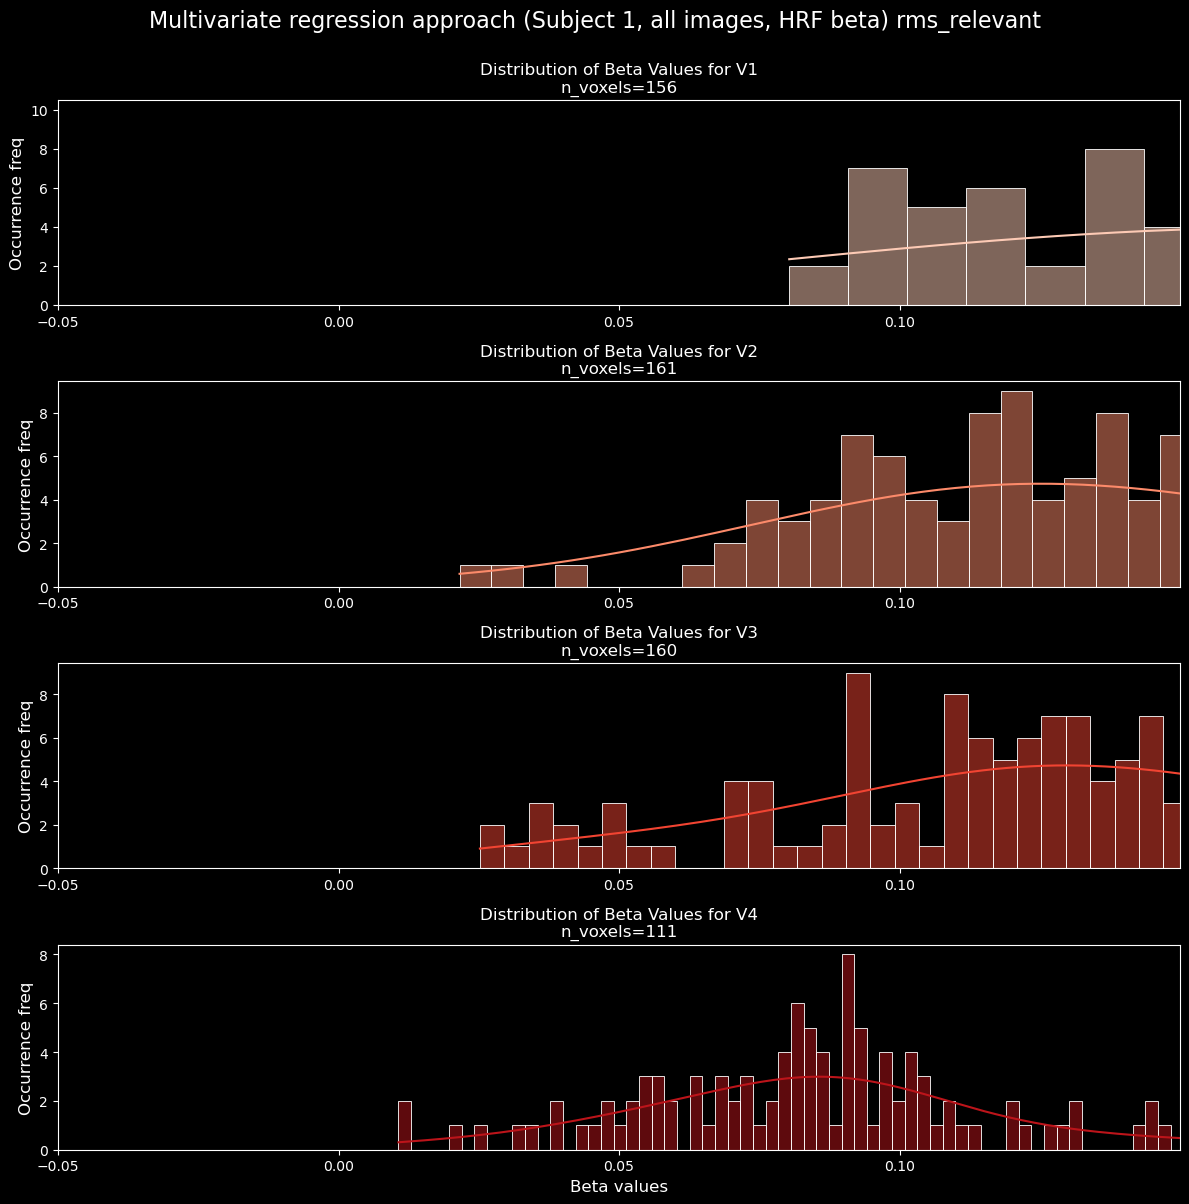

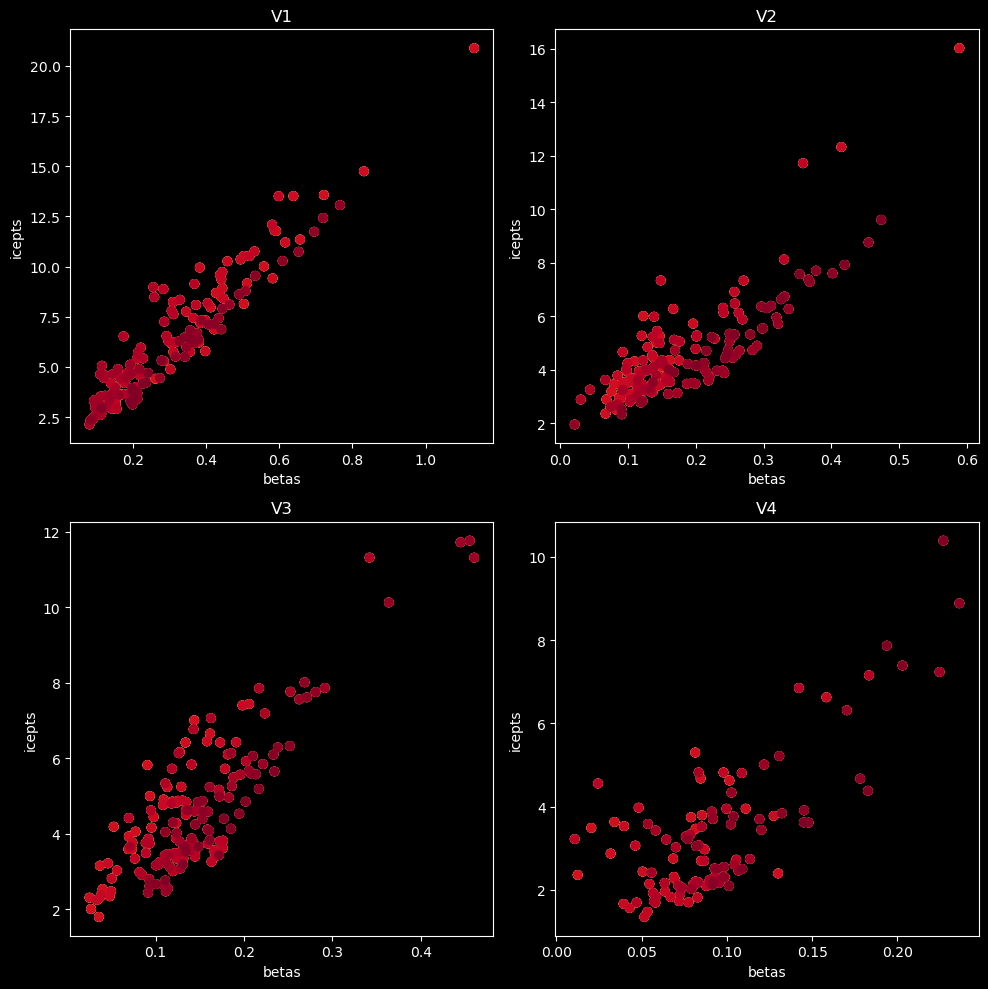

In [15]:
reg_plots(regdict_prfc_loose_rmsrel, 'rms_relevant', beta_hist = True, beta_icept = True)

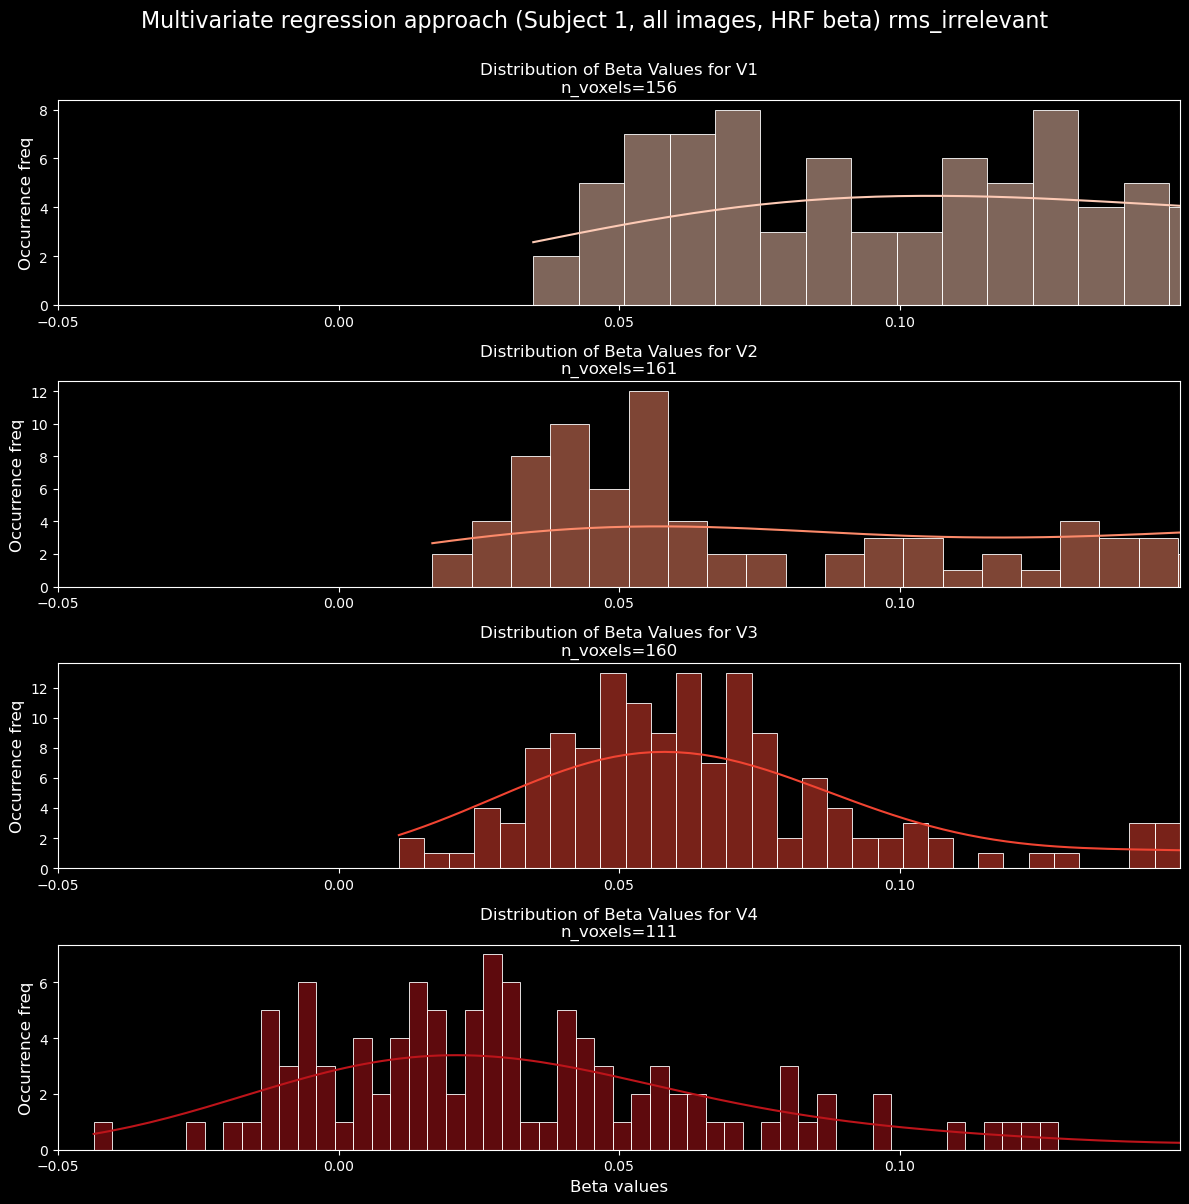

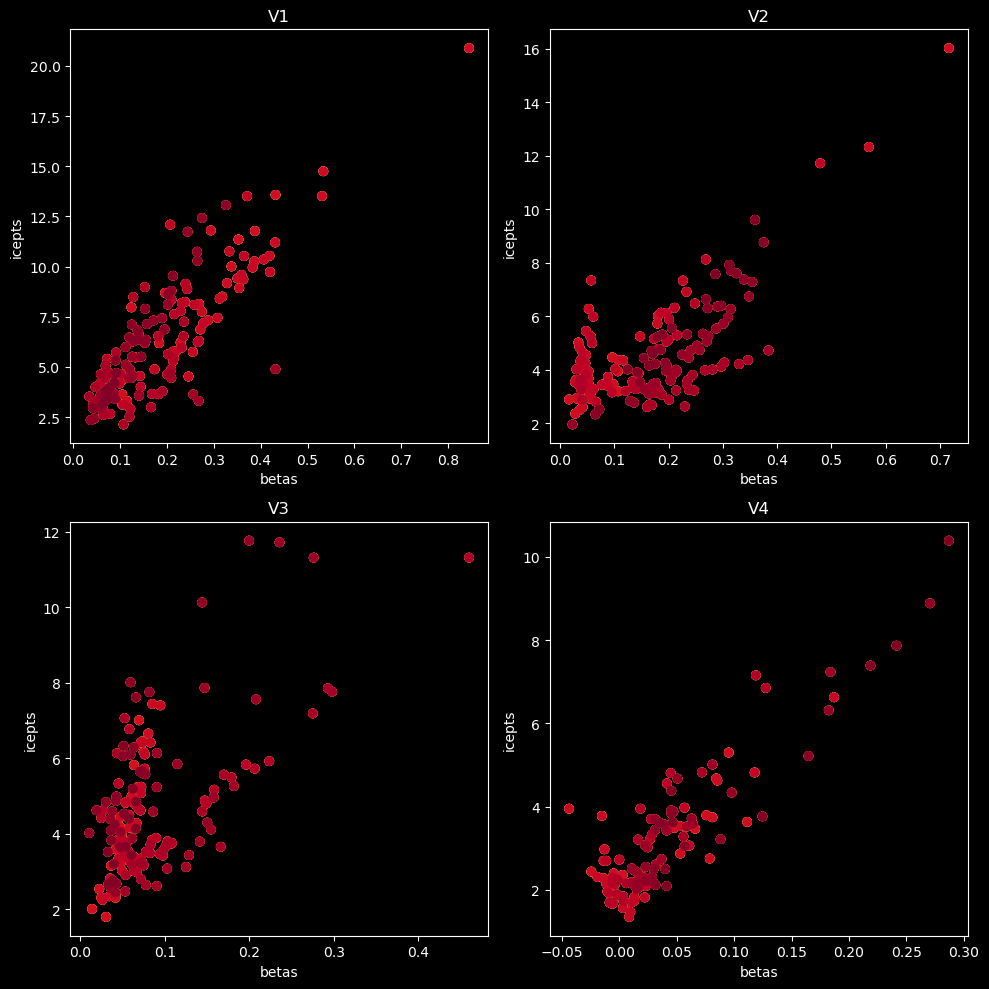

In [16]:

reg_plots(regdict_prfc_loose_rmsirrel, 'rms_irrelevant', beta_hist = True, beta_icept = True)

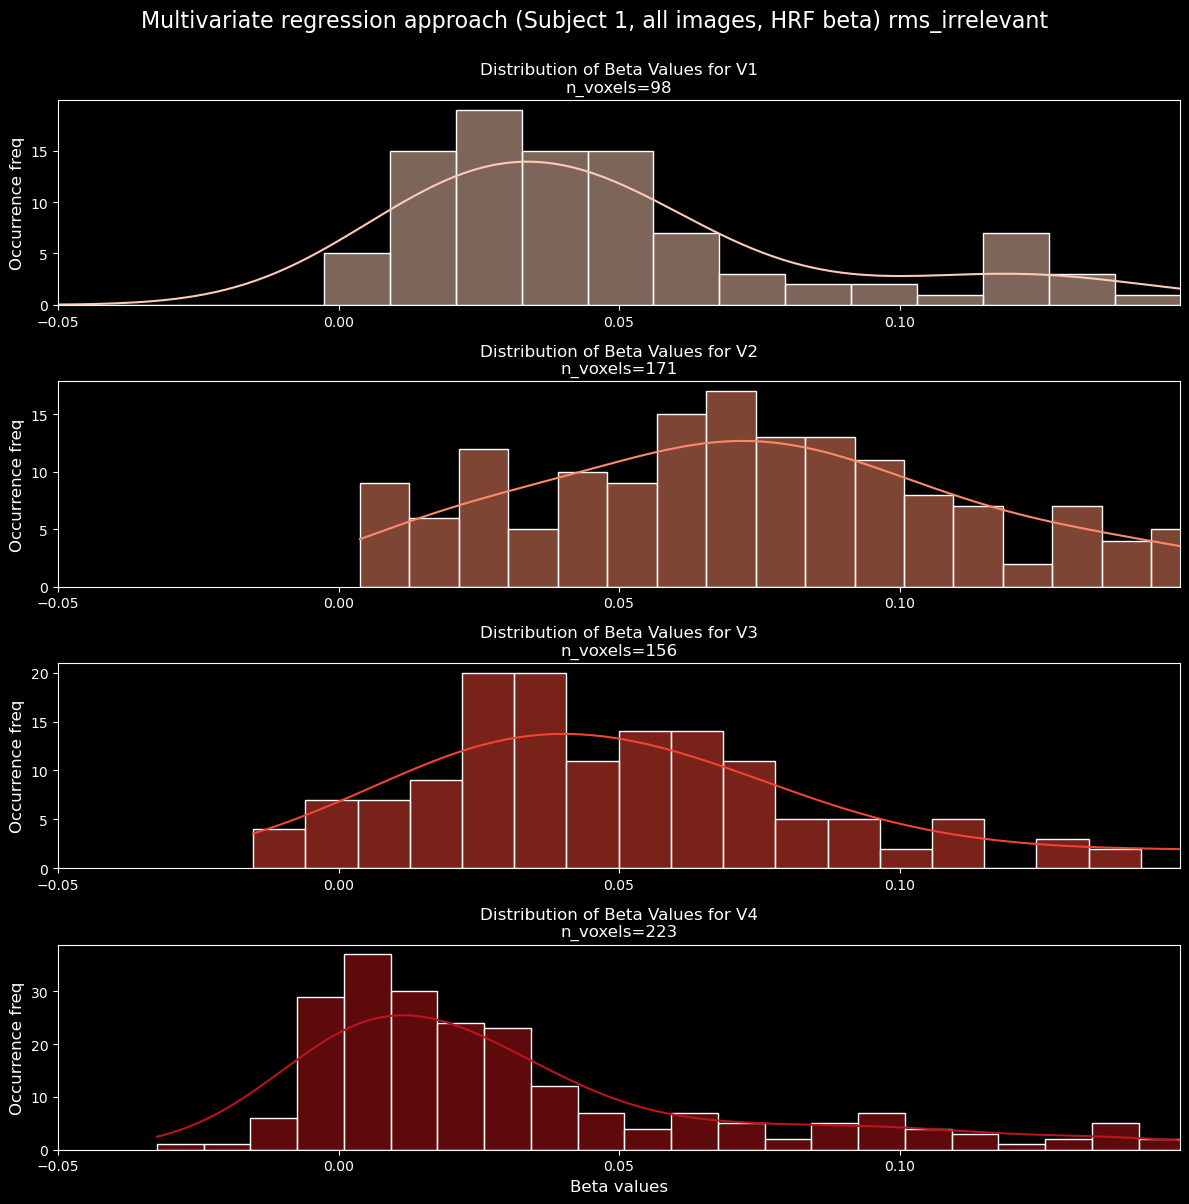

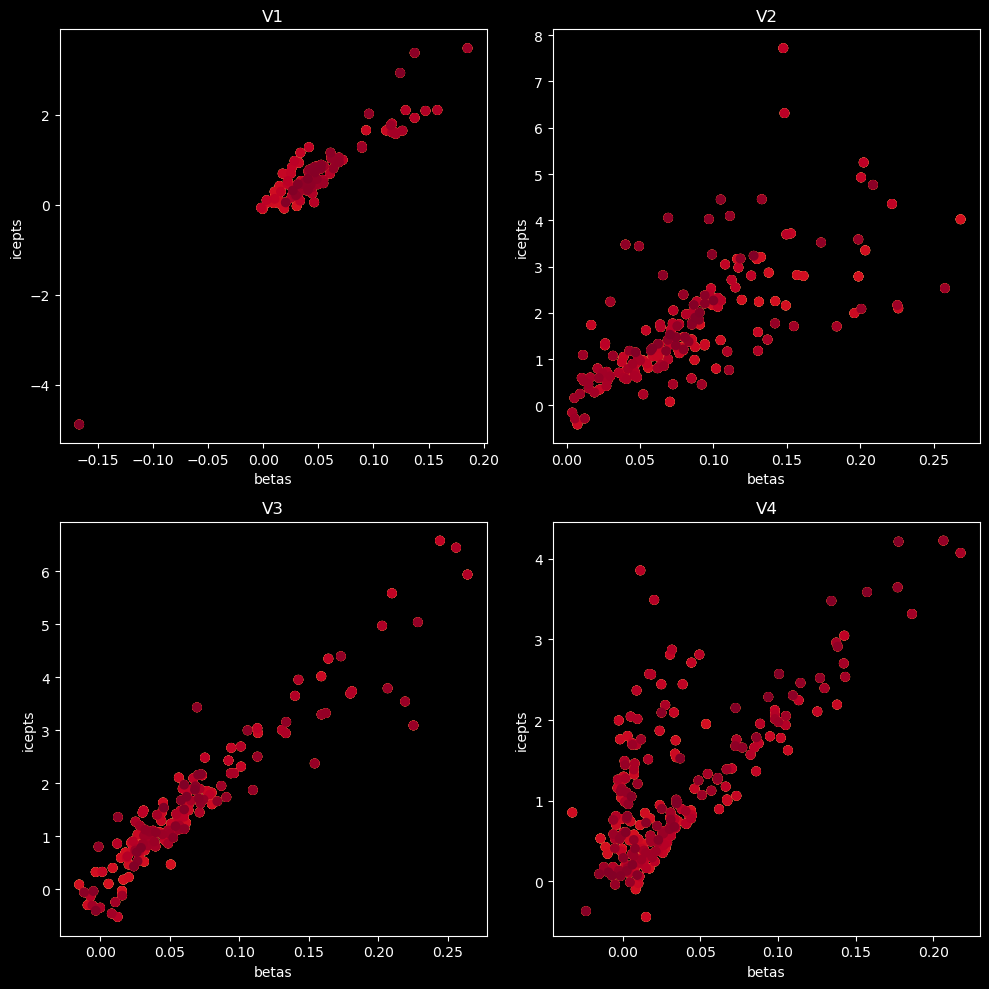

In [19]:
reg_plots(regdict_prfc_tight_rmsrel, 'rms_relevant', beta_hist = True, beta_icept = True)

In [143]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def plot_roi_beta_distribution(reg_dict, dictname1 = '', icept_correct = None, feat_type = '', comparison_reg_dict = None, dictname2 = '', comptype = ''):
    plt.style.use('dark_background')  # Apply dark background theme
    fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=False)
    
    # COol custom color palettes
    colors = LinearSegmentedColormap.from_list("my_palette", ["darkblue", "blue"], N=len(reg_dict))
    comparison_colors = LinearSegmentedColormap.from_list("my_palette", ["darkred", "red"], N=len(comparison_reg_dict)) if comparison_reg_dict else None

    num_bins = 40  # Specify the number of bins
    icept_values = []
    min_x = np.inf
    max_x = -np.inf
    for i, (roi, voxels) in enumerate(reg_dict.items()):
        
        beta_values = np.concatenate([voxel_data['beta'] for voxel_data in voxels['voxels'].values()])
        plot_vals = beta_values
        icept_values = np.concatenate([np.array([voxel_data['icept']]) for voxel_data in voxels['voxels'].values()])        

        if icept_correct == 'y':
            plot_vals = beta_values / icept_values

        sns.histplot(plot_vals, kde=True, ax=axes[i], color=colors(i/len(reg_dict)), label=f'{dictname1} ({len(beta_values)} voxels)', bins=num_bins, edgecolor='black', alpha = .8)  # Specify the bins

        min_x = min(min_x, np.min(plot_vals))
        max_x = max(max_x, np.max(plot_vals))

        if comparison_reg_dict is not None and roi in comparison_reg_dict:
            comparison_voxels = comparison_reg_dict[roi]
            comparison_beta_values = np.concatenate([voxel_data['beta'] for voxel_data in comparison_voxels['voxels'].values()])
            comparison_plot_vals = comparison_beta_values
            comparison_icept_values = np.concatenate([np.array([voxel_data['icept']]) for voxel_data in comparison_voxels['voxels'].values()])        

            if icept_correct == 'y':
                comparison_plot_vals = comparison_beta_values / comparison_icept_values

            sns.histplot(comparison_plot_vals, kde=True, ax=axes[i], color=comparison_colors(i/len(comparison_reg_dict)), label=f'{dictname2} ({len(comparison_beta_values)} voxels)', bins=num_bins, edgecolor='black', alpha = .9)

            min_x = min(min_x, np.min(comparison_plot_vals))
            max_x = max(max_x, np.max(comparison_plot_vals))

        axes[i].set_title(f'Distribution of Beta Values for {roi[:2]}', color='white')

        axes[i].set_ylabel('Occurrence freq', weight = 'normal', fontsize = 12, color='white')
        axes[i].tick_params(colors='white')
        axes[0].legend(fontsize = 'large')

    for ax in axes:
        ax.set_xlim(min_x, max_x)  # Set the x range to include all data
        ax.set_xticks(np.around(np.arange(min_x, max_x, .2), 2))  # Set the ticks to be more frequent and round them

    if len(comptype) != 0: comptype = f'\n{comptype}' 
    
    fig.suptitle(f'Baseline visual feature regression of subject 1, {feat_type}{comptype}', fontsize=16, y=1, color='white')

    plt.tight_layout()
    plt.show()

In [144]:
def plot_beta_to_icept(reg_dict, dictdescrip1 = '', comparison_reg_dict = None, dictdescrip2 = ''):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    rois = ['V1_mask', 'V2_mask', 'V3_mask', 'V4_mask']

    for i, roi in enumerate(rois):
        betas = [beta for vox in reg_dict[roi] for beta in reg_dict[roi]['all_reg_betas']]
        icepts = [icept for vox in reg_dict[roi] for icept in reg_dict[roi]['all_intercepts']]

        row = i // 2
        col = i % 2

        axs[row, col].scatter(betas, icepts, c='blue', label=dictdescrip1)
        
        if comparison_reg_dict and roi in comparison_reg_dict:
            comparison_betas = [beta for vox in comparison_reg_dict[roi] for beta in comparison_reg_dict[roi]['all_reg_betas']]
            comparison_icepts = [icept for vox in comparison_reg_dict[roi] for icept in comparison_reg_dict[roi]['all_intercepts']]
            axs[row, col].scatter(comparison_betas, comparison_icepts, c='red', label=dictdescrip2)

        axs[row, col].set_xlabel('betas', color='white')
        axs[row, col].set_ylabel('icepts', color='white')
        axs[row, col].set_title(roi[:2], color='white')
        axs[row, col].tick_params(colors='white')
    axs[0, 0].legend(fontsize = 'medium')

    fig.suptitle(f'Regression betas to intercepts of subject 1, {feat_type}{comptype}', fontsize=16, y=1, color='white')

    plt.tight_layout()
    plt.show()

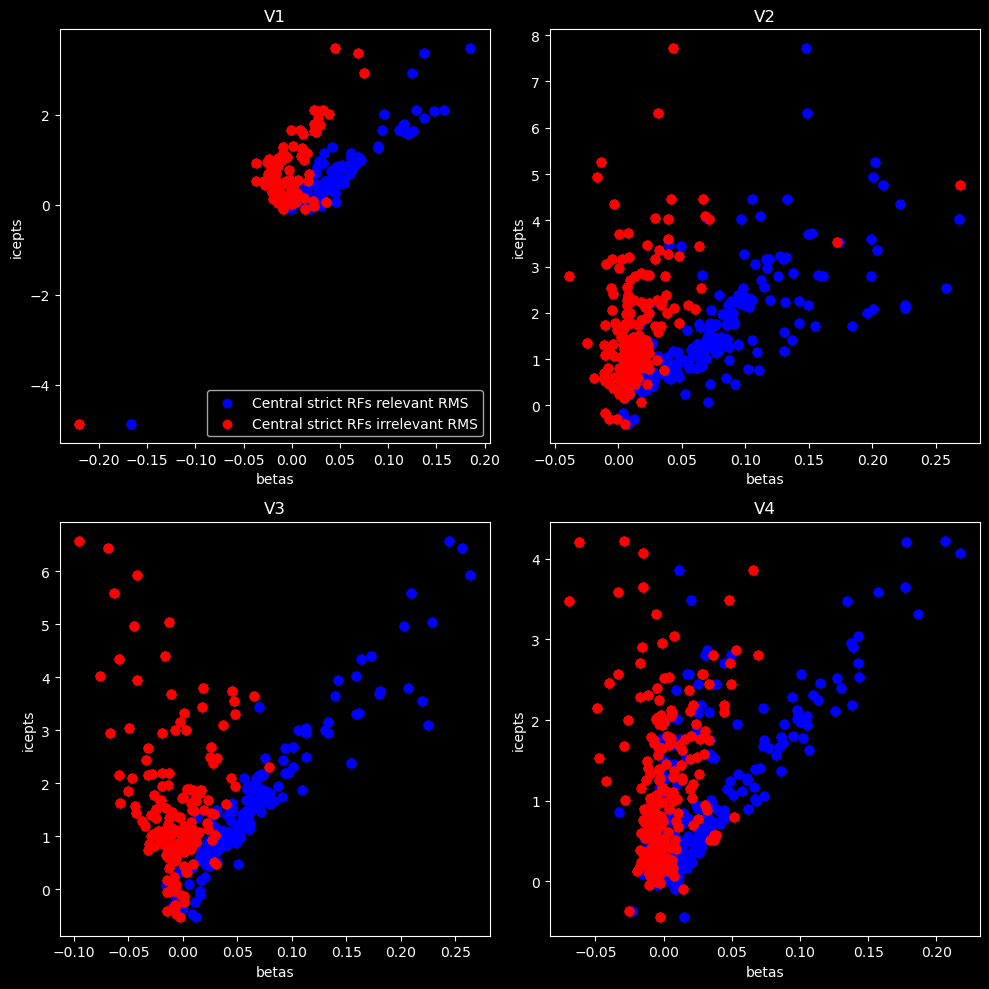

In [145]:
plot_beta_to_icept(regdict_prfc_tight_rmsrel, 'Central strict RFs relevant RMS', regdict_prfc_tight_rmsirrel, 'Central strict RFs irrelevant RMS')

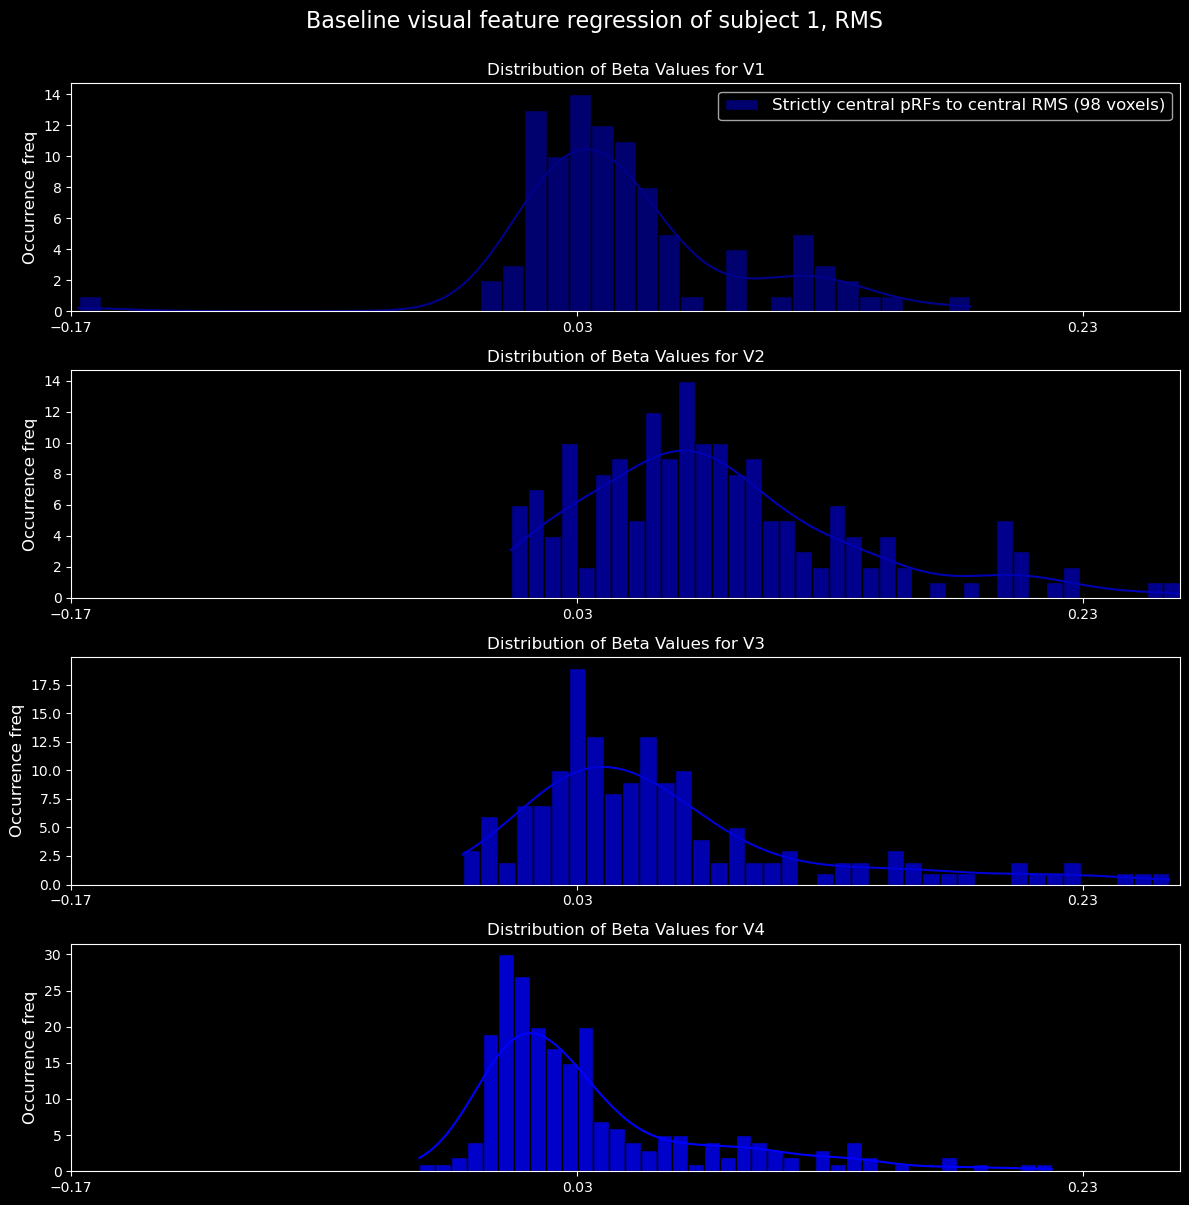

In [146]:
import seaborn as sns
plot_roi_beta_distribution(regdict_prfc_tight_rmsrel, dictname1 = 'Strictly central pRFs to central RMS',
                           icept_correct = 'n', feat_type = 'RMS')

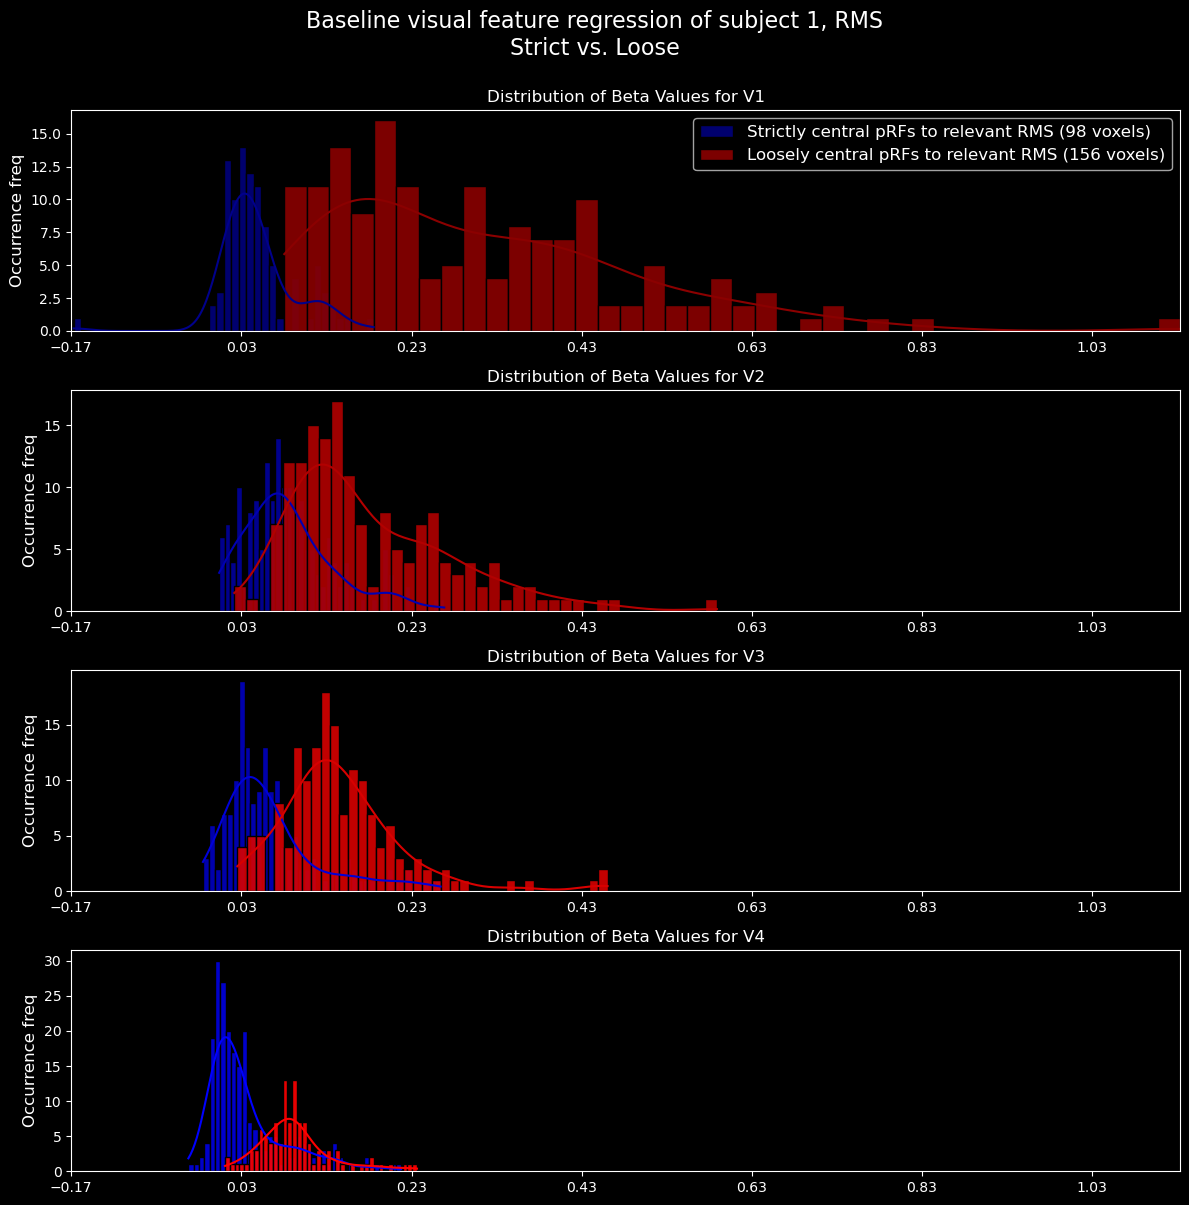

In [147]:
import seaborn as sns
plot_roi_beta_distribution(regdict_prfc_tight_rmsrel, dictname1 = 'Strictly central pRFs to relevant RMS', comptype = 'Strict vs. Loose',
                           icept_correct = 'n', feat_type = 'RMS', comparison_reg_dict = regdict_prfc_loose_rmsrel, 
                           dictname2 = 'Loosely central pRFs to relevant RMS')

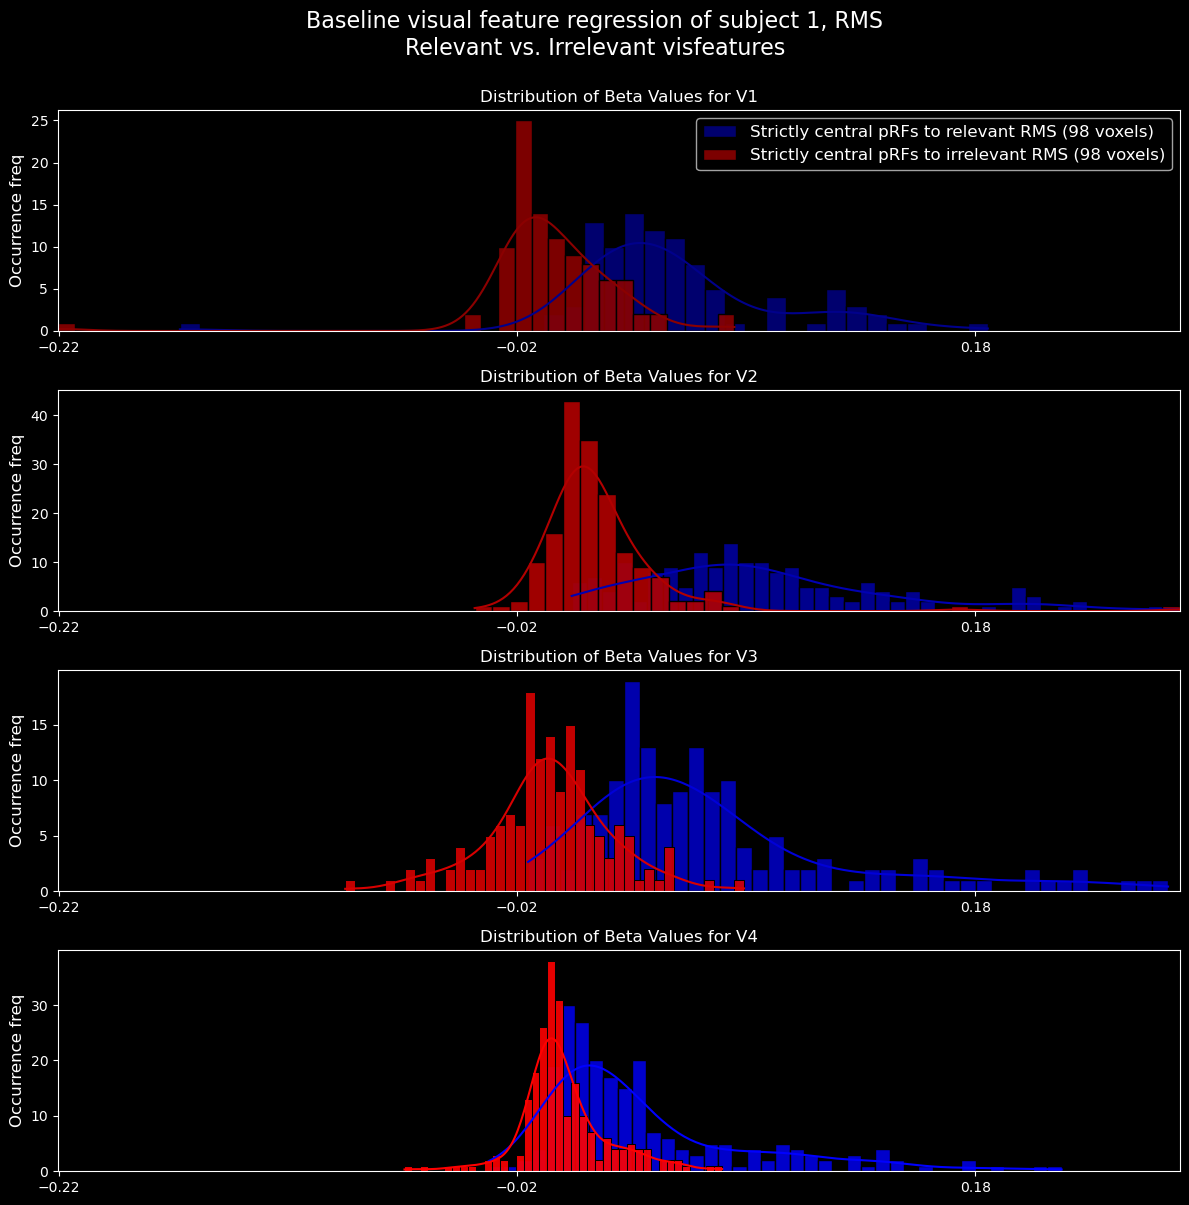

In [148]:
import seaborn as sns
plot_roi_beta_distribution(regdict_prfc_tight_rmsrel, dictname1 = 'Strictly central pRFs to relevant RMS', comptype = 'Relevant vs. Irrelevant visfeatures',
                           icept_correct = 'n', feat_type = 'RMS', comparison_reg_dict = regdict_prfc_tight_rmsirrel, 
                           dictname2 = 'Strictly central pRFs to irrelevant RMS')

In [159]:

def plot_roi_beta_distribution(reg_dict, dictdescrip1 = '', icept_correct = None, feat_type = '', comparison_reg_dict = None, dictdescrip2 = '', comptype = ''):
    plt.style.use('dark_background')  # Apply dark background theme
    fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=False)
    
    # COol custom color palettes
    colors = LinearSegmentedColormap.from_list("my_palette", ["darkblue", "blue"], N=len(reg_dict))
    comparison_colors = LinearSegmentedColormap.from_list("my_palette", ["darkred", "red"], N=len(comparison_reg_dict)) if comparison_reg_dict else None

    num_bins = 40  # Specify the number of bins
    icept_values = []
    min_x = np.inf
    max_x = -np.inf
    for i, (roi, voxels) in enumerate(reg_dict.items()):
        
        beta_values = np.concatenate([voxel_data['beta'] for voxel_data in voxels['voxels'].values()])
        plot_vals = beta_values
        icept_values = np.concatenate([np.array([voxel_data['icept']]) for voxel_data in voxels['voxels'].values()])        

        if icept_correct == 'y':
            plot_vals = beta_values / icept_values

        sns.histplot(plot_vals, kde=True, ax=axes[i], color=colors(i/len(reg_dict)), label=f'{dictdescrip1} ({len(beta_values)} voxels)', bins=num_bins, edgecolor='black', alpha = .8)  # Specify the bins

        min_x = min(min_x, np.min(plot_vals))
        max_x = max(max_x, np.max(plot_vals))

        if comparison_reg_dict is not None and roi in comparison_reg_dict:
            comparison_voxels = comparison_reg_dict[roi]
            comparison_beta_values = np.concatenate([voxel_data['beta'] for voxel_data in comparison_voxels['voxels'].values()])
            comparison_plot_vals = comparison_beta_values
            comparison_icept_values = np.concatenate([np.array([voxel_data['icept']]) for voxel_data in comparison_voxels['voxels'].values()])        

            if icept_correct == 'y':
                comparison_plot_vals = comparison_beta_values / comparison_icept_values

            sns.histplot(comparison_plot_vals, kde=True, ax=axes[i], color=comparison_colors(i/len(comparison_reg_dict)), label=f'{dictdescrip2} ({len(comparison_beta_values)} voxels)', bins=num_bins, edgecolor='black', alpha = .9)

            min_x = min(min_x, np.min(comparison_plot_vals))
            max_x = max(max_x, np.max(comparison_plot_vals))

        axes[i].set_title(f'Distribution of Beta Values for {roi[:2]}', color='white')

        axes[i].set_ylabel('Occurrence freq', weight = 'normal', fontsize = 12, color='white')
        axes[i].tick_params(colors='white')
        axes[0].legend(fontsize = 'large')

    for ax in axes:
        ax.set_xlim(min_x, max_x)  # Set the x range to include all data
        ax.set_xticks(np.around(np.arange(min_x, max_x, .2), 2))  # Set the ticks to be more frequent and round them

    if len(comptype) != 0: comptype = f'\n{comptype}' 
    
    fig.suptitle(f'Baseline visual feature regression of subject 1, {feat_type}{comptype}', fontsize=16, y=1, color='white')

    plt.tight_layout()
    plt.show()
    
    
def plot_beta_to_icept(reg_dict, dictdescrip1 = '', comparison_reg_dict = None, feat_type = '', dictdescrip2 = '', comptype = ''):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    rois = ['V1_mask', 'V2_mask', 'V3_mask', 'V4_mask']

    for i, roi in enumerate(rois):
        betas = [beta for vox in reg_dict[roi] for beta in reg_dict[roi]['all_reg_betas']]
        icepts = [icept for vox in reg_dict[roi] for icept in reg_dict[roi]['all_intercepts']]

        row = i // 2
        col = i % 2

        axs[row, col].scatter(betas, icepts, c='blue', label=dictdescrip1)
        
        if comparison_reg_dict and roi in comparison_reg_dict:
            comparison_betas = [beta for vox in comparison_reg_dict[roi] for beta in comparison_reg_dict[roi]['all_reg_betas']]
            comparison_icepts = [icept for vox in comparison_reg_dict[roi] for icept in comparison_reg_dict[roi]['all_intercepts']]
            axs[row, col].scatter(comparison_betas, comparison_icepts, c='red', label=dictdescrip2)

        axs[row, col].set_xlabel('betas', color='white')
        axs[row, col].set_ylabel('icepts', color='white')
        axs[row, col].set_title(roi[:2], color='white')
        axs[row, col].tick_params(colors='white')
    axs[0, 0].legend(fontsize = 'medium')

    fig.suptitle(f'Regression betas to intercepts of subject 1, {feat_type}{comptype}', fontsize=16, y=1, color='white')

    plt.tight_layout()
    plt.show()

In [160]:
# reg_dict, dictname1 = '', icept_correct = None, feat_type = '', comparison_reg_dict = None, dictname2 = '', comptype = ''

def reg_plots(reg_dict, dictdescrip1 = '', icept_correct = None, feat_type = None, 
              beta_hist:bool = True, beta_icept:bool = True, comparison_reg_dict = None, 
              dictdescrip2 = '', comptype = ''):
            
    if beta_hist:
        plot_roi_beta_distribution(reg_dict = reg_dict, dictdescrip1 = dictdescrip1, icept_correct = icept_correct, 
                                   feat_type = feat_type, comparison_reg_dict = comparison_reg_dict, 
                                   dictdescrip2 = dictdescrip2, comptype = comptype)
    if beta_icept:
        plot_beta_to_icept(reg_dict = reg_dict, dictdescrip1 = dictdescrip1, comparison_reg_dict = comparison_reg_dict, 
                           feat_type = feat_type, dictdescrip2 = dictdescrip2, comptype = comptype)

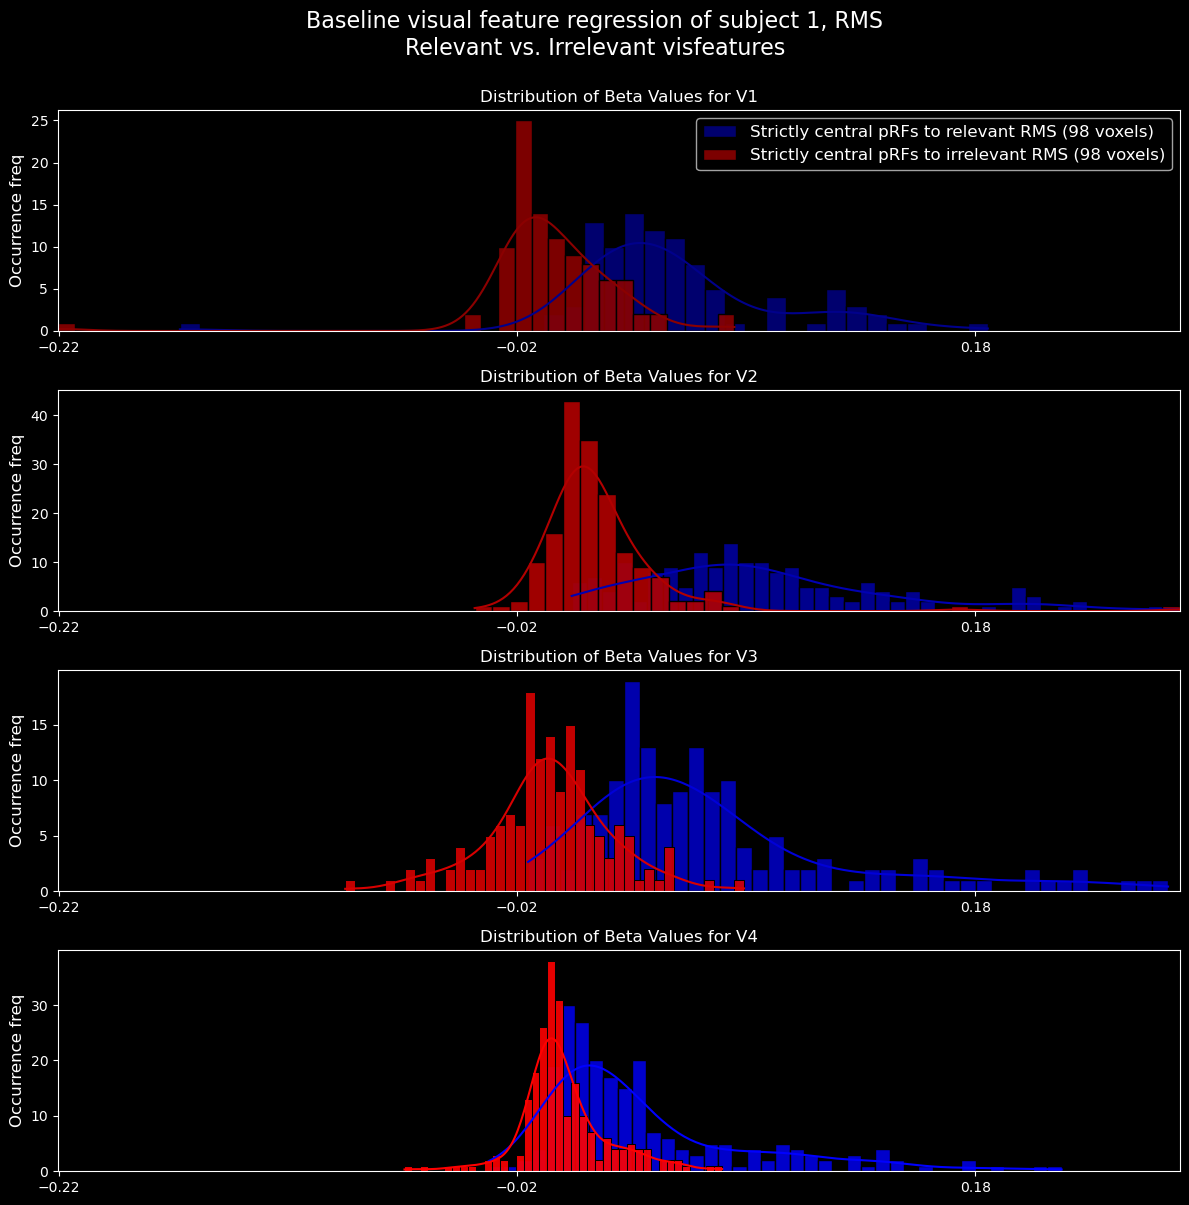

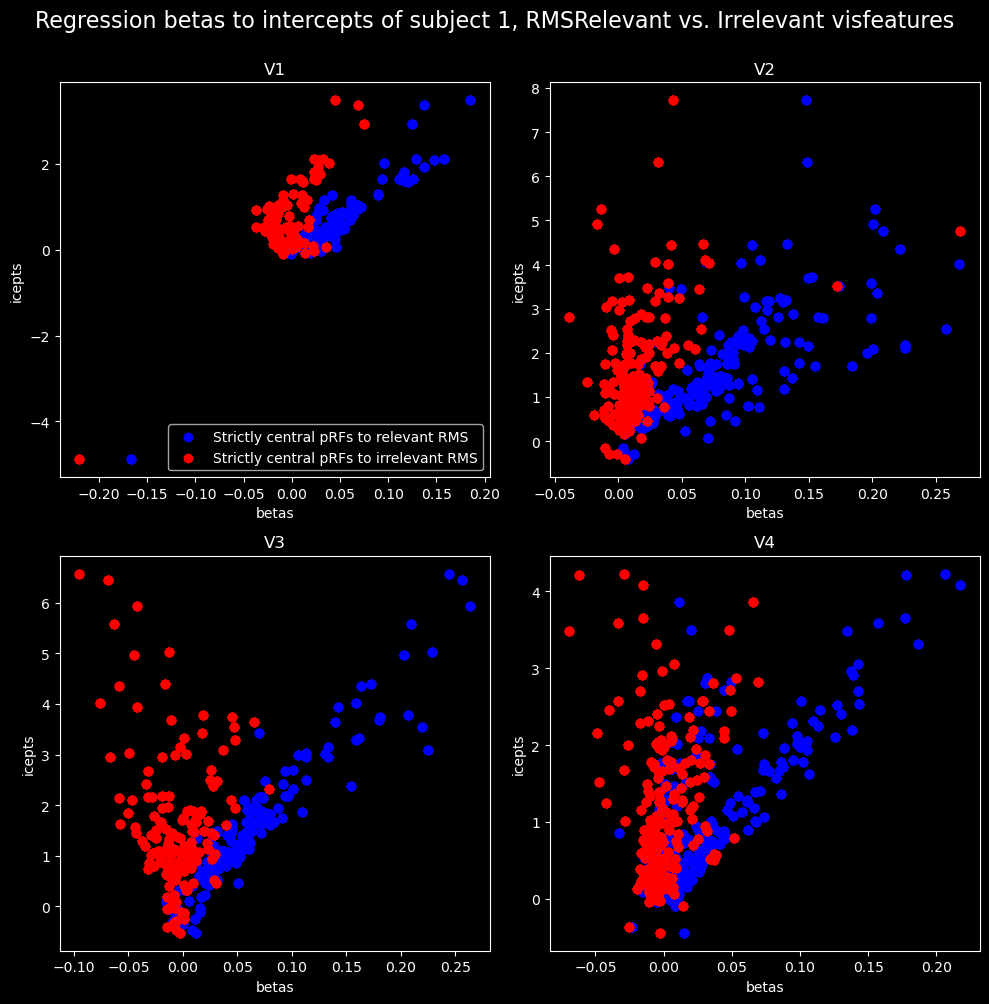

In [161]:
reg_plots(regdict_prfc_tight_rmsrel, dictdescrip1 = 'Strictly central pRFs to relevant RMS', comptype = 'Relevant vs. Irrelevant visfeatures',
                           icept_correct = 'n', feat_type = 'RMS', comparison_reg_dict = regdict_prfc_tight_rmsirrel, 
                           dictdescrip2 = 'Strictly central pRFs to irrelevant RMS', beta_hist = True, beta_icept = True)